# PyTorch Computer Vision

## 03. Computer vision libraries in PyTorch

* `torchvision` - a package that provides access to popular datasets, model architectures, and image transformations for computer vision.
* `torchvision.datasets` - a package that provides access to popular datasets.
* `torchvision.models` - a package that provides access to models that are ready to use for computer vision.
* `torchvision.transforms` - a package that provides common image transformations for computer vision.
* `torch.utils.data.Dataset` - a class that represents a dataset.
* `torch.utils.data.DataLoader` - a class that represents a data loader, which is an iterable that provides access to a dataset.


In [3]:
# Import PyTorch
import torch
import torch.nn as nn

# Import torchvision
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matlpotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.0+cpu
0.15.1+cpu


In [4]:
!pip install torchvision

In [5]:
import torchvision

## 1. Setup our data

In [6]:
# Setup training data 
from torchvision import datasets 
train_data = datasets.FashionMNIST(
    root="data", # where to download data to? 
    train=True, # do we want the training dataset? 
    download=True, # do we want to download yes/no? 
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data? 
    target_transform=None # how do we want to transform the labels/targets? 
    ) 

test_data = datasets.FashionMNIST(
    root="data", 
    train=False, 
    download=True, 
    transform=ToTensor(), 
    target_transform=None
    )
 
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# See the first training example 
image, label = train_data[0] 
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names = train_data.classes 
class_to_idx = train_data.class_to_idx
class_names, class_to_idx, train_data.targets

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9},
 tensor([9, 0, 0,  ..., 3, 0, 5]))

### 1.1 Check input and output shapes of data

In [9]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {class_names[label]}")    

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

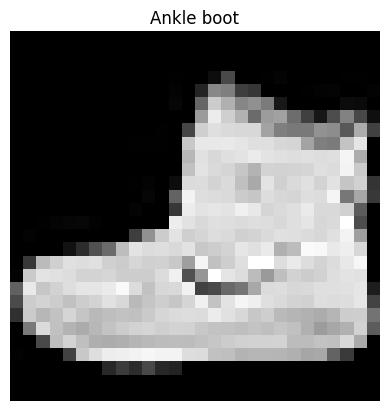

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")

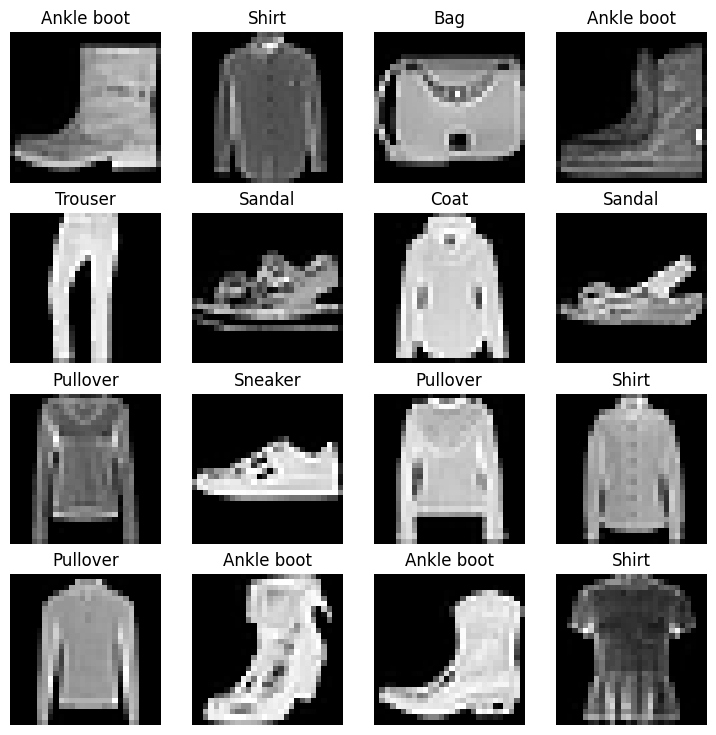

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches) of a particular size.

Why would we do this? 
1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60,000 images at once. So we break it down to 32 images at a time (for batch size 32).
2. It gives our neural network more chances to update its gradients per epoch.


In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparam
BATCH_SIZE = 32

# Turn dataset into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x20ffa6cfcd0>,
 <torch.utils.data.dataloader.DataLoader at 0x20ffa6cf550>)

In [13]:
# Let's check out what we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of DataLoaders: {len(train_dataloader), len(test_dataloader)} batches of size {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000020FFA6CFCD0>, <torch.utils.data.dataloader.DataLoader object at 0x0000020FFA6CF550>)
Length of DataLoaders: (1875, 313) batches of size 32


In [14]:
# Check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Image label: Shirt, Label size: torch.Size([])


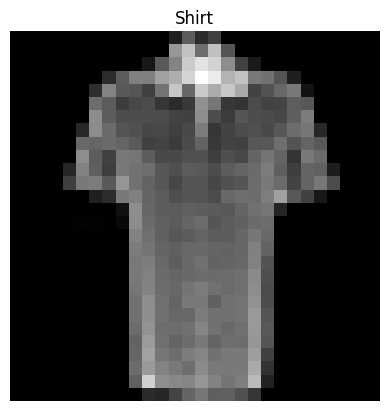

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image size: {img.shape}")
print(f"Image label: {class_names[label]}, Label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of ML modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model that you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(f"Original shape: {x.shape}")

print(f"Flattened shape: {flatten_model(x).shape}")

Original shape: torch.Size([1, 28, 28])
Flattened shape: torch.Size([1, 784])


In [41]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape:int, 
                 hidden_units:int, 
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)
            

In [42]:
torch.manual_seed(42)

# Setup model with input params
model_0 = FashionMNISTModelV0(
    input_shape=28*28, 
    hidden_units=10, 
    output_shape=10
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [43]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [44]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer, and evaluation metrics

* Loss function - Since we are workign with multi-class data, our loss function will be `nn.CrossEntropyLoss`.
* Optimizer - our optimizer will be `torch.optim.SGD` (stochastic gradient descent).
* Evaluation metric - since we are working on a classification problem, let's use accuracy as our evaluation metric.


In [45]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("File already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

File already exists, skipping download


In [46]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

ML is very experimental.

Two of the main things you will often want to track are:
1. Model's performance (loss and accuracy values, etc.)
2. How fast it runs


In [47]:
from timeit import default_timer as timer 

def print_train_time(start:float,
                    end:float,
                    device:torch.device=None):
    """ Prints difference between start and end time"""
    total_time = end - start
    print(f"Training time: {total_time:.4f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all

In [24]:
# Import tqdm for progress bar
!pip install tqdm

In [48]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we will keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------------------------")
    
    ### Training
    
    train_loss = 0
    
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate the loss for every batch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Backward pass
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what is happening
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
    
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # since helper function does not take logits

        # Calculate test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

        # Print out what's happening
        print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device)
                                            )
                                                               

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:06<00:12,  6.39s/it]


Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:12<00:06,  6.37s/it]


Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:19<00:00,  6.34s/it]


Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Training time: 19.0281 seconds


## 4. Make predictions and get Model 0 results

In [49]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predictions on data_loader"""
    loss, acc = 0., 0.
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Forward pass
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            # Calculate loss
            loss += loss_fn(y_pred, y)
            # Calculate accuracy
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [50]:
# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

## 5. Setup device-agnostic code (for using a GPU if available)

In [28]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02

In [51]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(), # Add non-linearity
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [52]:
# Instantiate model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 6.1 Setup loss, optimizer and evaluation metrics

In [53]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [141]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
    """Performs a training step with model trying to learn on data_loader"""

    train_loss, train_acc = 0,0

    # Set model to training mode
    model.train()
    
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Move data to device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate the loss for every batch
        train_acc += accuracy_fn(y_true=y, 
                                 y_pred=y_pred.argmax(dim=1))
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Backward pass
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what is happening
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/{len(data_loader.dataset)} samples")
    
    # Divide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [142]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    
    """Performs a testing step with model going over data_loader"""
    test_loss, test_acc = 0, 0

    # Set model to evaluation mode
    model.eval()

    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Move data to device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # Forward pass (outputs raw logits)
            test_pred = model(X_test)

            # Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


In [55]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------------------------")
    
    # Training
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=device)

    # Testing
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start, 
                                            end=train_time_end,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:06<00:13,  6.70s/it]

Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.78097 | Train acc: 71.94%


 67%|██████▋   | 2/3 [00:13<00:06,  6.69s/it]

Test loss: 0.72611 | Test acc: 73.99%

Epoch: 2
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.67040 | Train acc: 75.94%


100%|██████████| 3/3 [00:19<00:00,  6.65s/it]

Test loss: 0.69007 | Test acc: 74.81%

Training time: 19.9635 seconds


In [56]:
model_0_results, total_train_time_model_0 

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4766390025615692,
  'model_acc': 83.42651757188499},
 19.028124299999945)

In [57]:
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_results, total_train_time_model_1

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6900656223297119,
  'model_acc': 74.810303514377},
 19.96345620000011)

**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU rather than on a GPU.

Why is this?

1. It could be that the overhead for copying the data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware you are using has a better CPU in terms of compute capabilities than the GPU.


## 7. Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their ability to capture spatial hierarchies in data.

In [160]:
# Create a convolutional neural network model
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(1, -1),
            nn.Linear(in_features=hidden_units*7*7, # There's a trick to calculating this... 
                      out_features=output_shape),
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block1(x)
        # print(f"Output shape of conv_block1: {x.shape}")
        x = self.conv_block2(x)
        # print(f"Output shape of conv_block2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x  

In [109]:
image.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

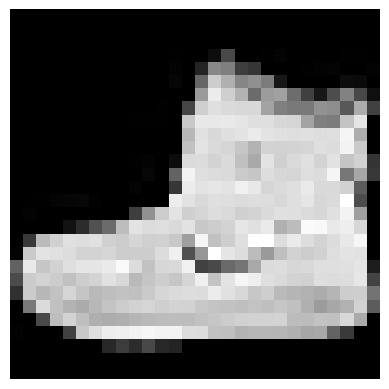

In [81]:
plt.imshow(image.squeeze(), cmap="gray")
plt.axis("off")

In [161]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1, # input shape is the number of colour channels in the image 
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

In [83]:
image.shape

torch.Size([1, 28, 28])

In [84]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [158]:
# Pass image through model
output = model_2(rand_image_tensor)
output


tensor([ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
        -0.0158, -0.0177], grad_fn=<AddBackward0>)

### 7.1 Stepping through `nn.Conv2d`

In [61]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [74]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                    out_channels=10,
                    kernel_size=3,
                    stride=1,
                    padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [72]:
test_image.shape

torch.Size([3, 64, 64])

In [77]:
# Print out original image shape without unsqueezing
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqueezed shape: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Test image through conv layer shape: {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Test image through conv and max pool layer shape: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Test image through conv layer shape: torch.Size([10, 64, 64])
Test image through conv and max pool layer shape: torch.Size([10, 32, 32])


In [79]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax Pool Tensor:\n {max_pool_tensor}")
print(f"Max Pool Tensor shape: {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max Pool Tensor:
 tensor([[[[0.3367]]]])
Max Pool Tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setting up the loss function and optimizer for `model_2`

In [163]:
# Setup loss function/eval metrics and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [144]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [164]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------------------------")
    
    # Training
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=device)

    # Testing
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, 
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59792 | Train acc: 78.20%


 33%|███▎      | 1/3 [00:16<00:33, 16.99s/it]

Test loss: 0.38250 | Test acc: 86.19%

Epoch: 1
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.35765 | Train acc: 87.06%


 67%|██████▋   | 2/3 [00:35<00:17, 17.70s/it]

Test loss: 0.34995 | Test acc: 87.26%

Epoch: 2
-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.32165 | Train acc: 88.33%


100%|██████████| 3/3 [00:53<00:00, 17.84s/it]

Test loss: 0.32617 | Test acc: 88.06%

Training time: 53.5335 seconds


In [165]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_2_results, total_train_time_model_2

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3261664807796478,
  'model_acc': 88.0591054313099},
 53.53347229999963)

## 8. Compare model results and training time

In [167]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, 
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.690066,74.810304
2,FashionMNISTModelV2,0.326166,88.059105


In [168]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,19.028124
1,FashionMNISTModelV1,0.690066,74.810304,19.963456
2,FashionMNISTModelV2,0.326166,88.059105,53.533472


Text(0, 0.5, 'Model')

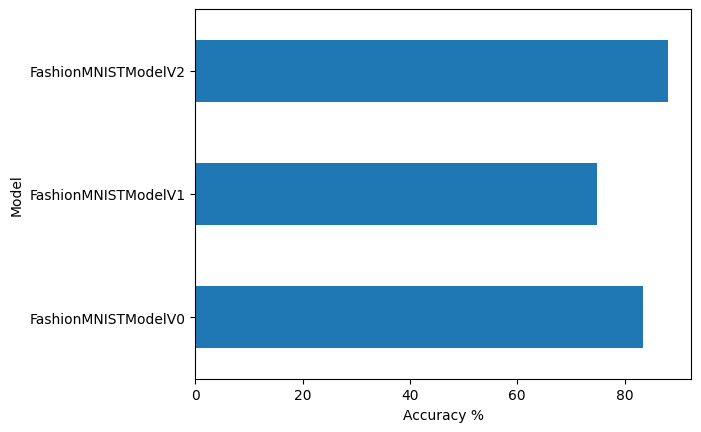

In [169]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy %")
plt.ylabel("Model")

## 9. Make and evaluate random predictions with best model

In [170]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    
    pred_probs = []
    
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and move to device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probabilities (logits -> prediction probabilities)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations (matplotlib doesn't work on GPU)
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [172]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [183]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

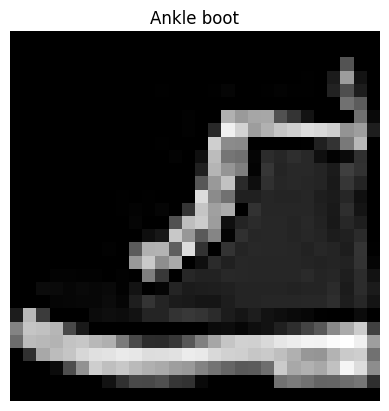

In [184]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis("off")

In [185]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[2.0007e-05, 4.2911e-06, 3.5064e-05, 5.9647e-04, 2.2114e-05, 8.3832e-02,
         2.7228e-05, 2.7470e-03, 1.3006e-02, 8.9971e-01],
        [1.1331e-05, 2.1122e-06, 1.4191e-05, 2.7410e-06, 4.6333e-06, 2.9968e-04,
         1.1949e-06, 9.8444e-01, 1.2835e-03, 1.3940e-02]])

In [186]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

In [187]:
# Convert prediction probabilities to class labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

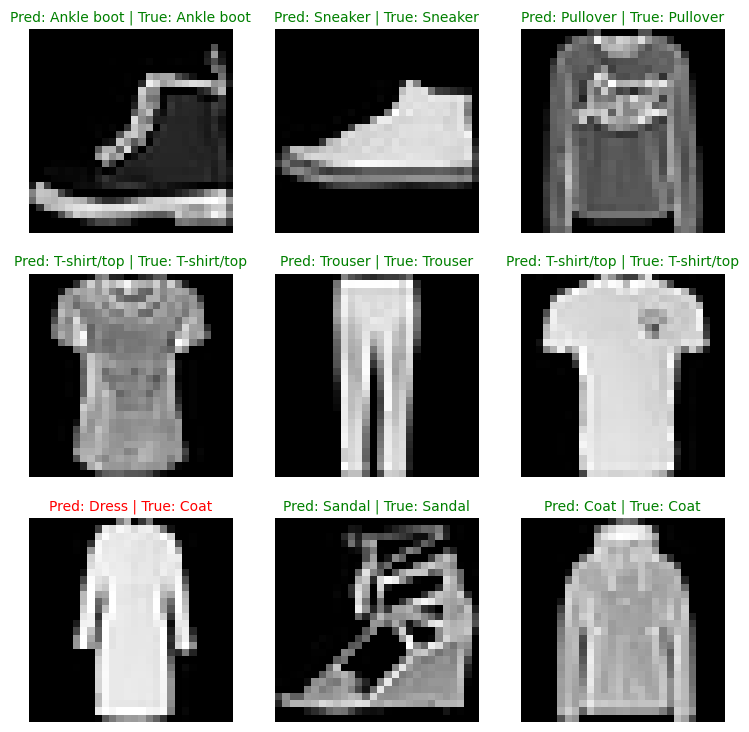

In [188]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create subplot for each image
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray") # squeeze to remove the batch dimension

    # Find the prediction (in text form)
    pred_label = class_names[pred_classes[i]]

    # Find the true label (in text form)
    true_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | True: {true_label}"

    # Check for equality between pred and truth and change color of title text
    plt.title(title_text, fontsize= 10, color="green" if pred_label == true_label else "red")
    plt.axis("off")

## 10. Making a confusion matrix for further evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix`

In [190]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.4 MB 4.2 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 11.5 MB/s eta 0:00:00


In [193]:
!pip install torchmetrics

   ---------------------------------------- 0.0/840.2 kB ? eta -:--:--
   ------- -------------------------------- 153.6/840.2 kB 3.1 MB/s eta 0:00:01
   ------------------------------------ --- 768.0/840.2 kB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 840.2/840.2 kB 7.6 MB/s eta 0:00:00


In [195]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make prediciton with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Move data to device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_logit = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put prediction on CPU for evaluation
        y_pred = y_pred.cpu()
        y_preds.append(y_pred)

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|██████████| 313/313 [00:01<00:00, 236.06it/s]


tensor([9, 2, 1,  ..., 8, 1, 2])

In [197]:
import mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [200]:
# See if required packages are installed and if not, install them...
try:
    import mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version is too old, please update")
except:
    !pip install mlxtend
    print("mlxtend installed")
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1
mlxtend installed
mlxtend version: 0.23.1


In [210]:
!pip install torchmetrics

  Using cached torchmetrics-1.3.0.post0-py3-none-any.whl.metadata (20 kB)
Using cached torchmetrics-1.3.0.post0-py3-none-any.whl (840 kB)


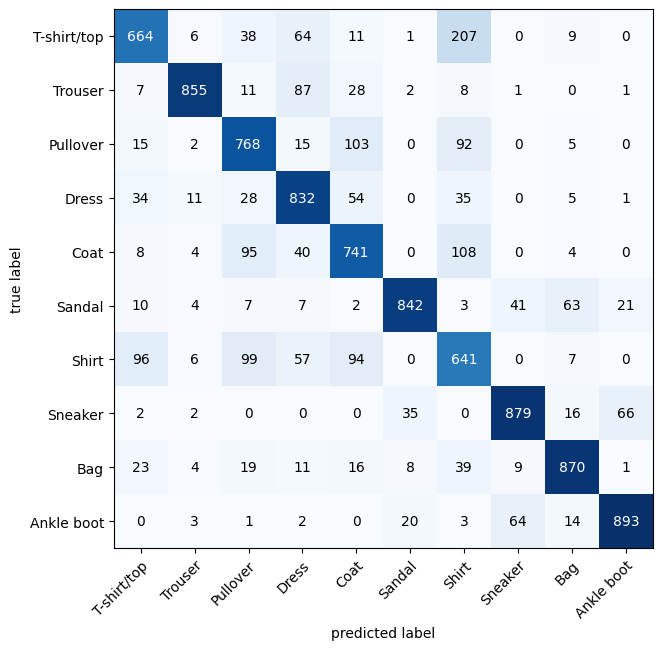

In [212]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="MULTICLASS")
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # matplot lib doesn't work with tensors
                                figsize=(10, 7),
                                class_names=class_names)
                                

## 11. Save and load best performing model

In [217]:
from pathlib import Path 

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth


In [221]:
# Create new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1, # input shape is the number of colour channels in the image
                                    hidden_units=10,
                                    output_shape=len(class_names)).to(device)

# Load in the saved state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to device
loaded_model_2.to(device)
loaded_model_2

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [222]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3261664807796478,
 'model_acc': 88.0591054313099}

In [223]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3261664807796478,
 'model_acc': 88.0591054313099}

In [226]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-2) # absolute tolerance

tensor(True)